<a href="https://colab.research.google.com/github/MasDiptha12/Machine-Learning/blob/main/UTS/Classification_Model/Classification_Models_Predict_Discrete_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pengumpulan & Pembersihan Data

Pada tahap ini, kita akan memuat data, memeriksa struktur dataset, dan melakukan pembersihan. Dalam kasus ini, kita akan menghapus data yang hilang dan duplikat.

In [25]:
# Import library yang dibutuhkan
import pandas as pd

# Membaca dataset
data = pd.read_csv('/content/KlasifikasiUTS.csv')  # Gantilah dengan path file yang sesuai

# Menampilkan 5 baris pertama dari dataset
data.head()

# Menampilkan info dataset
data.info()

# Menghapus baris yang memiliki nilai yang hilang (jika ada)
data_cleaned = data.dropna()

# Menghapus kolom duplikat jika ada
data_cleaned = data_cleaned.drop_duplicates()

# Menampilkan info dataset setelah pembersihan
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 2. Feature Selection

Fitur yang tidak informatif dihapus, seperti fitur konstan, duplikat, dan fitur dengan korelasi sangat tinggi. Kemudian, fitur yang memiliki hubungan signifikan dengan target dipilih menggunakan Mutual Information. Hanya fitur-fitur penting yang digunakan untuk pelatihan model.










In [29]:
# Pisahkan fitur dan target
X = data_cleaned.drop(['Class'], axis=1)  # Kolom target adalah 'Class'
y = data_cleaned['Class']  # Kolom target adalah 'Class'

# Menghapus fitur yang konstan (variasi = 0)
X = X.loc[:, (X.var() != 0)]

# Menghapus fitur yang berkorelasi tinggi (> 0.8)
cor_matrix = X.corr()

# Menghapus salah satu kolom dari pasangan yang memiliki korelasi > 0.8
to_drop = set()
for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if abs(cor_matrix.iloc[i, j]) > 0.8:  # Korelasi lebih besar dari 0.8
            colname = cor_matrix.columns[i]
            to_drop.add(colname)

X = X.drop(columns=to_drop)

# Menampilkan fitur yang tersisa
print("Fitur yang tersisa setelah seleksi:")
print(X.columns)

# Jika masih ada fitur yang tersisa, lakukan Mutual Information
if X.shape[1] > 0:
    from sklearn.feature_selection import mutual_info_classif

    mi = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    # Pilih 10 fitur terbaik berdasarkan mutual information
    selected_features = mi_scores.index[:10]
    X_selected = X[selected_features]

    print("Fitur yang dipilih berdasarkan Mutual Information:")
    print(X_selected.columns)
else:
    print("Tidak ada fitur yang tersisa setelah seleksi.")

Fitur yang tersisa setelah seleksi:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Fitur yang dipilih berdasarkan Mutual Information:
Index(['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9'], dtype='object')


# 3. Feature Engineering

Data ditransformasi menggunakan StandardScaler agar fitur berada pada skala yang sama. Karena semua fitur numerik, tidak diperlukan encoding tambahan. Data siap digunakan untuk pelatihan model.

In [30]:
# Import library yang dibutuhkan
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Scaling Fitur Numerik
# Standarisasi data fitur (Scaling ke rentang yang sama)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)  # Menggunakan X_selected yang sudah diseleksi fitur

# Membagi Data menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data train dan test
print(f"Data Train: {X_train.shape}")
print(f"Data Test: {X_test.shape}")

Data Train: (226980, 10)
Data Test: (56746, 10)


# 4. Modeling

Lima model klasifikasi dilatih: Logistic Regression, Decision Tree, KNN, Random Forest (Bagging), dan SVM. Masing-masing model dilatih menggunakan data yang telah dibersihkan dan ditransformasi. Evaluasi awal dilakukan dengan akurasi, precision, recall, dan F1-score.

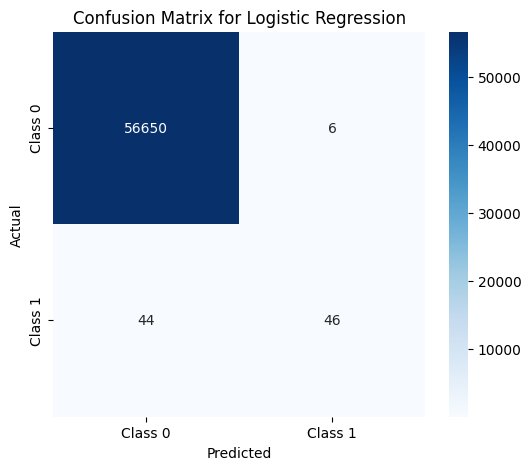

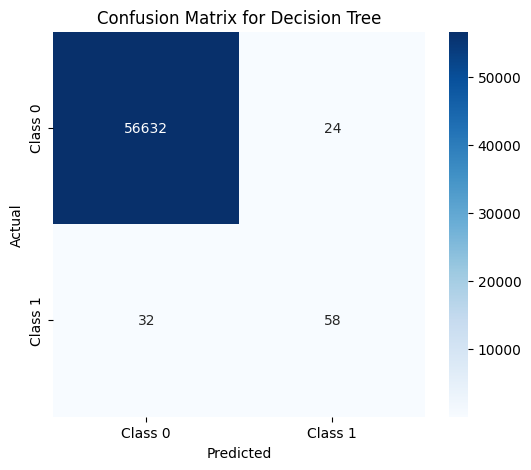

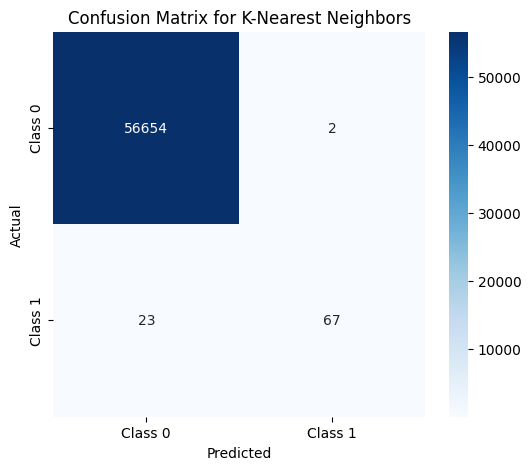

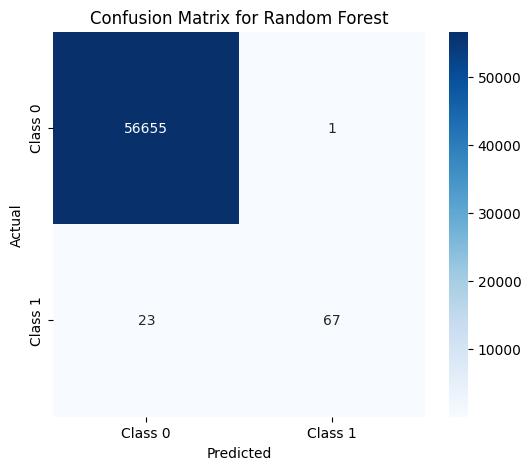

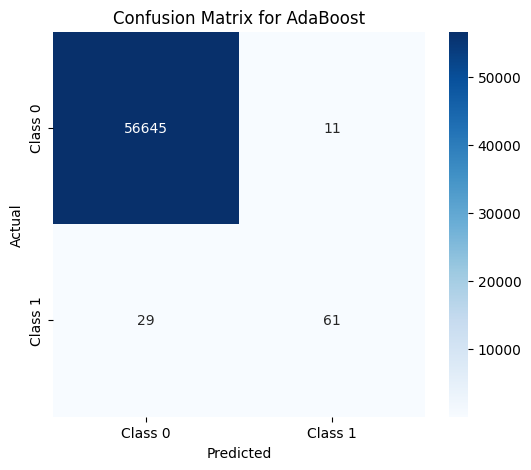

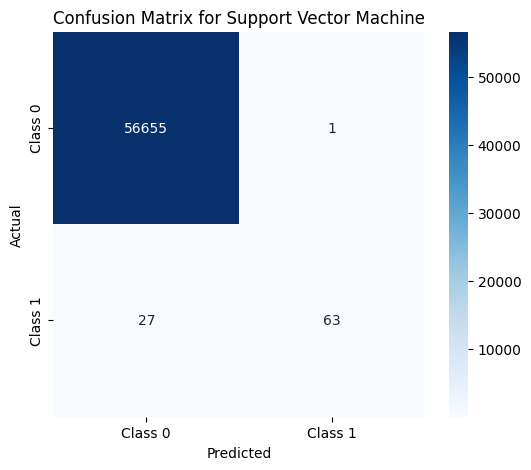

Hasil Evaluasi Metrik untuk Setiap Model:
                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.999119   0.884615  0.511111  0.647887
Decision Tree           0.999013   0.707317  0.644444  0.674419
K-Nearest Neighbors     0.999559   0.971014  0.744444  0.842767
Random Forest           0.999577   0.985294  0.744444  0.848101
AdaBoost                0.999295   0.847222  0.677778  0.753086
Support Vector Machine  0.999507   0.984375  0.700000  0.818182


In [31]:
# Import library yang diperlukan
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat daftar model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC()
}

# Melatih model dan menghitung metrik evaluasi
results = {}

for model_name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Menyimpan hasil evaluasi
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Menampilkan confusion matrix untuk setiap model
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Menampilkan hasil metrik evaluasi
results_df = pd.DataFrame(results).T
print("Hasil Evaluasi Metrik untuk Setiap Model:")
print(results_df)

# 5. Evaluasi Model Lanjutan: ROC, AUC dan Penentuan Model Terbaik

ROC curve dan AUC dihitung dan divisualisasikan untuk setiap model. AUC menunjukkan seberapa baik model memisahkan kelas fraud dan non-fraud. Model dengan AUC dan F1-score tertinggi dipertimbangkan sebagai model terbaik.

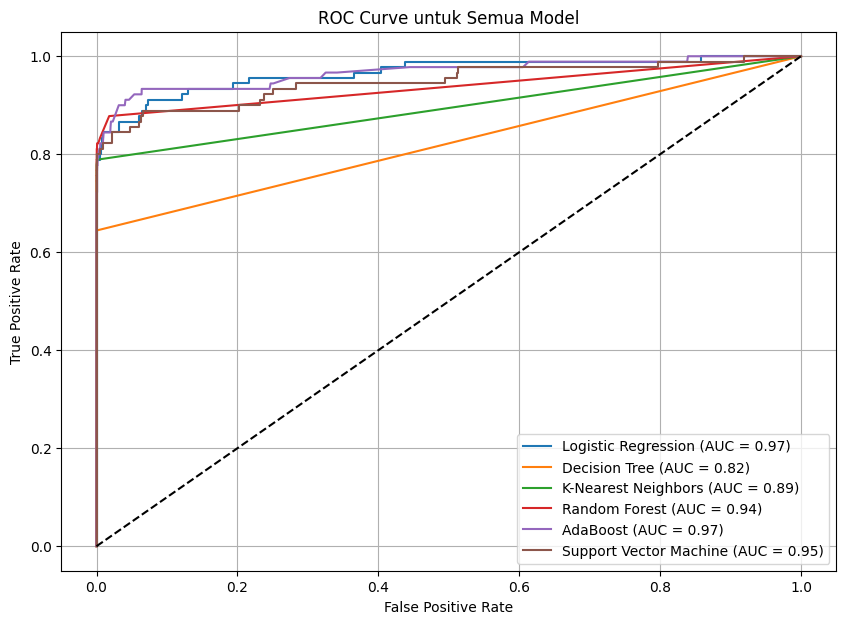

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Menginisialisasi plot ROC
plt.figure(figsize=(10, 7))

# Evaluasi dan visualisasi ROC AUC untuk setiap model
for model_name, model in models.items():
    # Beberapa model tidak memiliki predict_proba (seperti SVC tanpa probabilitas), jadi kita tangani terpisah
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
    else:
        # Gunakan decision_function jika predict_proba tidak tersedia (contoh: SVC)
        y_proba = model.decision_function(X_test)

    # Hitung ROC dan AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Konfigurasi plot
plt.plot([0, 1], [0, 1], 'k--')  # Garis referensi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Semua Model')
plt.legend()
plt.grid(True)
plt.show()

# 6. Visualisasi Setiap Model

Prediksi dari masing-masing model divisualisasikan menggunakan PCA untuk mereduksi data ke 2 dimensi. Visualisasi ini membantu memahami bagaimana model memisahkan kelas secara visual. Warna pada grafik menunjukkan hasil klasifikasi tiap model terhadap data uji.

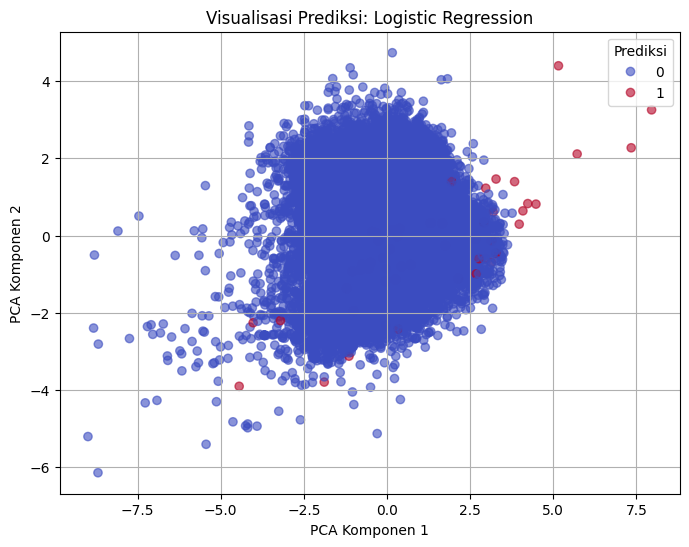

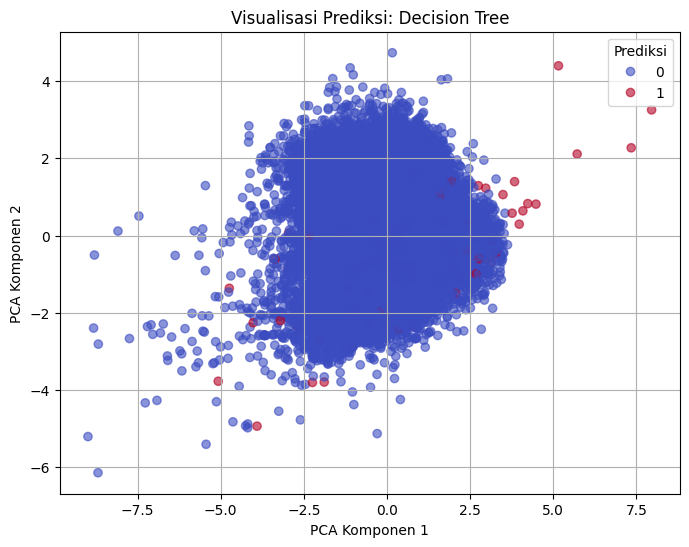

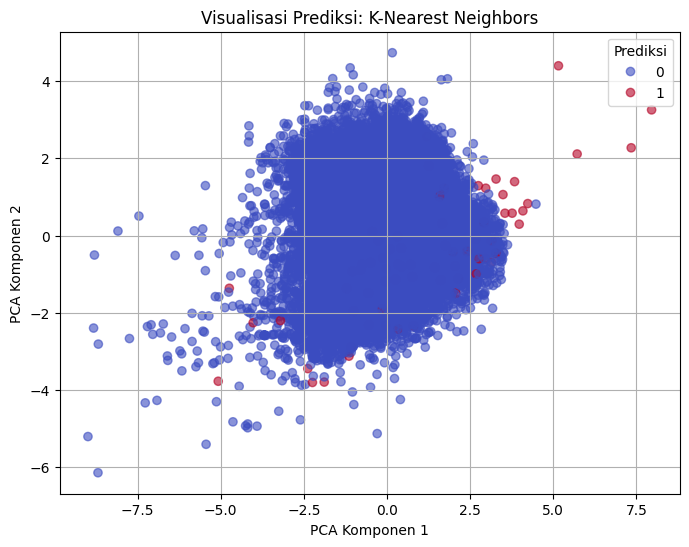

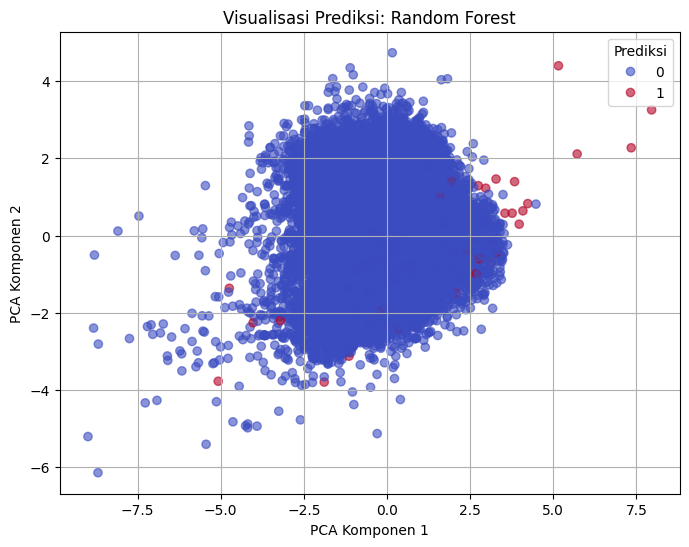

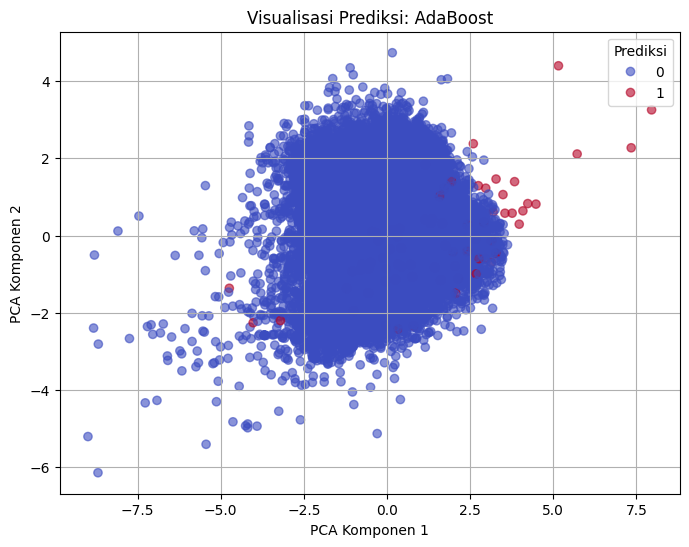

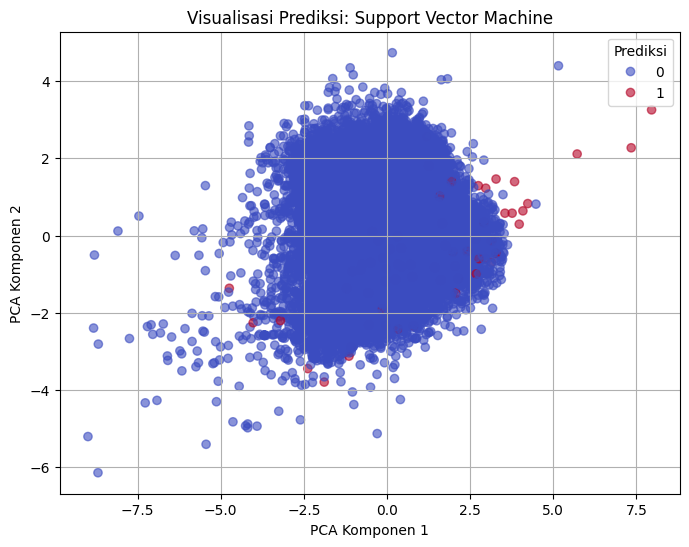

In [33]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D untuk visualisasi
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Fungsi untuk visualisasi prediksi model
def plot_model_prediction(model, model_name):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.title(f'Visualisasi Prediksi: {model_name}')
    scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6)
    plt.xlabel('PCA Komponen 1')
    plt.ylabel('PCA Komponen 2')
    plt.legend(*scatter.legend_elements(), title="Prediksi")
    plt.grid(True)
    plt.show()

# Tampilkan visualisasi untuk semua model
for model_name, model in models.items():
    plot_model_prediction(model, model_name)

---
# Penjelasan Model dan Perhitungan Matematis

### 1. **Logistic Regression**
Logistic Regression digunakan untuk memprediksi probabilitas kejadian suatu kelas (biasanya kelas 1).

#### Rumus:
$$
P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n)}}
$$
Rumus ini menggunakan fungsi sigmoid untuk mengubah hasil regresi linier menjadi probabilitas antara 0 dan 1.  
- $\beta_0$ adalah intercept.  
- $\beta_i$ adalah koefisien dari fitur $x_i$.  
- $e$ adalah bilangan Euler (~2.718).

<br>

### 2. **Decision Tree Classifier**
Decision Tree membagi data ke dalam cabang berdasarkan fitur untuk memaksimalkan kemurnian kelas.

#### Rumus (Gini Impurity):
$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$
Gini mengukur ketidakmurnian suatu node:  
- $p_i$ adalah proporsi kelas ke-$i$.  
- Jika hanya satu kelas dominan, Gini = 0 (murni).

<br>

### 3. **K-Nearest Neighbors (KNN)**
KNN mengklasifikasikan berdasarkan kelas mayoritas dari tetangga terdekat.

#### Rumus (Jarak Euclidean):
$$
d(x, x_i) = \sqrt{\sum_{j=1}^{n} (x_j - x_{ij})^2}
$$
Mengukur jarak antara titik uji \( x \) dan titik pelatihan \( x_i \):  
- $x_j$ adalah fitur ke-$j$ dari data uji.  
- $x_{ij}$ adalah fitur ke-$j$ dari data pelatihan ke-$i$.

<br>

### 4. **Random Forest (Bagging - Ensemble)**
Random Forest menggabungkan banyak pohon keputusan untuk meningkatkan akurasi.

#### Rumus (Voting Mayoritas):
$$
\hat{y} = \text{mode}(\{h_1(x), h_2(x), ..., h_m(x)\})
$$
- $h_i(x)$ adalah prediksi tree ke-$i$.  
- Output akhir $\hat{y}$ adalah kelas yang paling banyak dipilih (modus).

<br>

### 5. **Support Vector Machine (SVM)**
SVM mencari hyperplane terbaik yang memisahkan kelas dengan margin terbesar.

#### Rumus (Hard Margin):
$$
\min \frac{1}{2} \|\mathbf{w}\|^2 \quad \text{subject to} \quad y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1
$$
- $\mathbf{w}$ adalah vektor bobot.  
- $y_i \in \{-1, 1\}$, label kelas.  
- Konstraint menjamin semua titik diklasifikasi dengan benar dan margin minimal 1.

#### Rumus (Soft Margin):
$$
\min \frac{1}{2} \|\mathbf{w}\|^2 + C \sum \xi_i \quad \text{subject to} \quad y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i
$$
- Tambahan $\xi_i$ adalah slack variables (penalti error).  
- $C$ adalah parameter regulasi yang mengontrol trade-off antara margin dan kesalahan.

SVM juga dapat menggunakan **kernel trick** seperti RBF untuk klasifikasi non-linear.

---


---
# Perbandingan Model

Berdasarkan hasil evaluasi berbagai model regresi dengan metrik utama:

- **RMSE** (Root Mean Squared Error)
- **MSE** (Mean Squared Error)
- **R² Score**

### Perbandingan Model:

| Model                     | RMSE  | MSE    | R² Score |
| ------------------------- | ----- | ------ | -------- |
| Linear Regression          | 9.62  | 92.53  | 0.13     |
| Polynomial Regression      | 9.44  | 89.03  | 0.16     |
| Decision Tree Regressor    | 13.25 | 175.51 | -0.65    |
| KNN Regressor              | 9.50  | 90.27  | 0.15     |
| Bagging Regressor          | 9.58  | 91.86  | 0.14     |
| AdaBoost Regressor         | 11.73 | 137.53 | -0.29    |
| Gradient Boosting Regressor| 9.24  | 85.35  | 0.20     |
| SVR                        | 9.52  | 90.60  | 0.15     |

## Model Terbaik: Gradient Boosting Regressor

### Penjelasan:

- **RMSE dan MSE**: Menunjukkan prediksi yang paling mendekati nilai aktual.
- **R² Score**: Model ini menjelaskan variasi data target lebih baik dari model lainnya.
- **Stabilitas dan Kemampuan**: Gradient Boosting adalah metode ensemble yang mampu menangkap pola-pola halus dalam data dengan menggabungkan banyak model lemah secara bertahap.

### Kesimpulan:
Gradient Boosting Regressor adalah pilihan terbaik karena memberikan keseimbangan terbaik antara akurasi (RMSE/MSE rendah) dan kemampuan menjelaskan data (R² tinggi).

---